In [31]:
!pip install pytrends
import pandas as pd                        
from pytrends.request import TrendReq
pytrend = TrendReq()


In [32]:
pytrend.build_payload(kw_list = ["food near me","diet","gym","Health","Beach"],timeframe='2017-09-01 2021-03-17',geo='US')
df_A = pytrend.interest_over_time()

In [33]:
pytrend.build_payload(kw_list = ["diet pills","antidepressant"],timeframe='2017-09-01 2021-03-17',geo='US')
df_B = pytrend.interest_over_time()

In [34]:
df_C_2020 = pytrend.get_historical_interest(["food near me","Health"],year_start=2020, month_start=12, day_start=20, hour_start=0, year_end=2020, month_end=12, day_end=31, hour_end=0, cat=0, geo='US', sleep=240)
df_C_2020 = df_C_2020.drop('isPartial',axis = 1)

In [35]:
df_C_2019 = pytrend.get_historical_interest(["food near me","Health"],year_start=2019, month_start=12, day_start=20, hour_start=0, year_end=2019, month_end=12, day_end=31, hour_end=0, cat=0, geo='US', sleep=240)
df_C_2019 = df_C_2019.drop('isPartial',axis = 1)

In [36]:
df_C_2018 = pytrend.get_historical_interest(["food near me","Health"],year_start=2018, month_start=12, day_start=20, hour_start=0, year_end=2018, month_end=12, day_end=31, hour_end=0, cat=0, geo='US', sleep=240)
df_C_2018 = df_C_2018.drop('isPartial',axis = 1)

In [37]:
df_C_2017 = pytrend.get_historical_interest(["food near me","Health"],year_start=2017, month_start=12, day_start=20, hour_start=0, year_end=2017, month_end=12, day_end=31, hour_end=0, cat=0, geo='US', sleep=240)
df_C_2017 = df_C_2017.drop('isPartial',axis = 1)

In [38]:
df_C_2016 = pytrend.get_historical_interest(["food near me","Health"],year_start=2016, month_start=12, day_start=20, hour_start=0, year_end=2016, month_end=12, day_end=31, hour_end=0, cat=0, geo='US', sleep=240)
df_C_2016 = df_C_2016.drop('isPartial',axis = 1)

In [43]:
frames = [df_C_2020,df_C_2019,df_C_2018,df_C_2017,df_C_2016]
cday_df = pd.concat(frames,axis=1, join="inner")
cday_df
df_C_2016

,food near me,Health,isPartial
date,,,
2016-12-20 00:00:00,18,56,False
2016-12-20 01:00:00,16,50,False
2016-12-20 02:00:00,14,48,False
2016-12-20 03:00:00,12,47,False
2016-12-20 04:00:00,11,46,False
...,...,...,...
2016-12-30 20:00:00,16,69,False
2016-12-30 21:00:00,17,61,False
2016-12-30 22:00:00,22,51,False


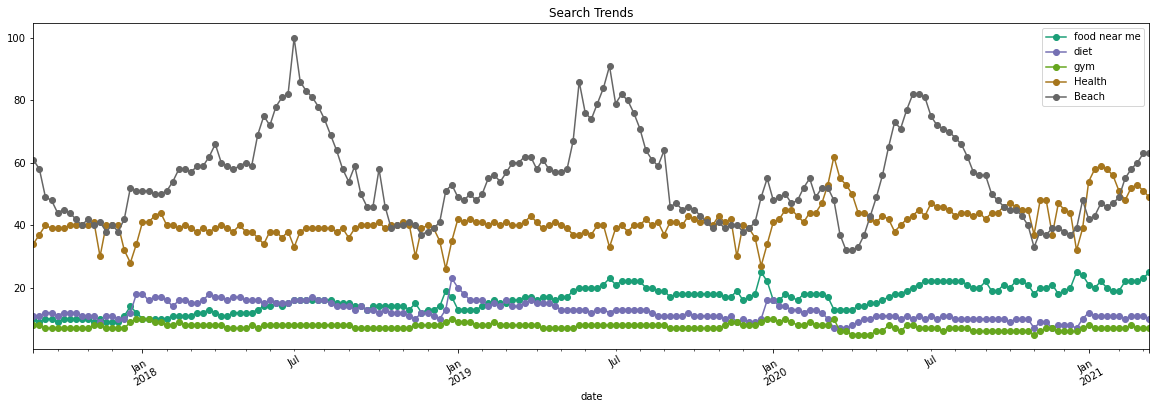

In [40]:
df_A.reset_index().plot(kind='line',x='date',title= 'Search Trends', style='-o', cmap='Dark2',figsize=(20,6), rot=30)

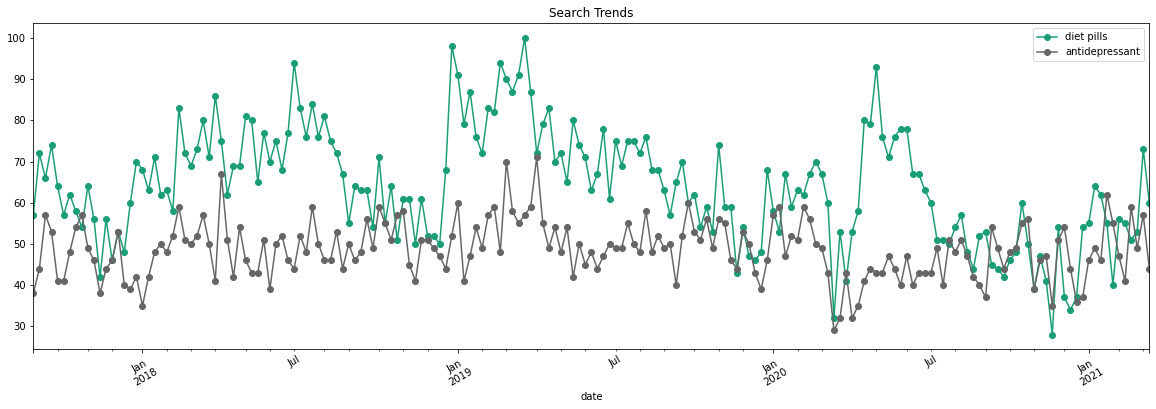

In [41]:
df_B.reset_index().plot(kind='line',x='date',title= 'Search Trends', style='-o', cmap='Dark2',figsize=(20,6), rot=30)

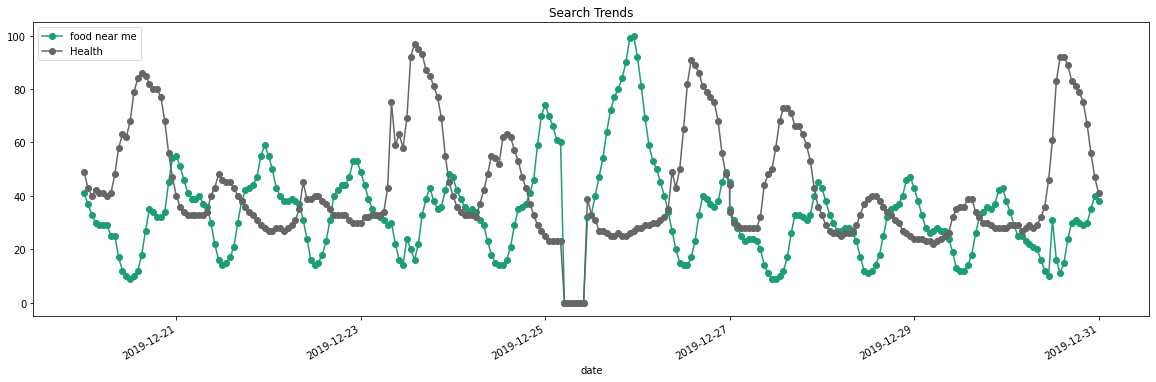

In [42]:
df_C_2019.reset_index().plot(kind='line',x='date',title= 'Search Trends', style='-o', cmap='Dark2',figsize=(20,6), rot=30)